In [258]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [259]:
#ESSENTIAL VARIABLES

# set the coordinates in tuple form of the polygon (currently decigon)
COORDINATES = [(0,2), (1,1), (2,0), (3,0), (4,1), (5,2), (4,3), (3,4), (2,4), (1,3)]
# number of children a parent births per run
BIRTH_SIZE = 1000
# number of children required to have the fittest distance before the final distance is determined
# higher = more accurate, but takes much more time, especially past 200
NUM_FITTEST_CHILDREN = 100

In [260]:
%%capture

# finds distance covered from index 0 to last index, moving left to right
# doesn't return to original index (full circle), stops at last index
def find_dist(coords):
    # get previous value to compute distance
    # here, prev is the first coordinate of the list, but later becomes the i-1 th coordinate
    prev = coords[0]
    
    # distance variable for summation
    dist = 0
    
    # iterate over coordinates, add distances between coordinates to total distance, repeat until done
    for i in range(1, len(coords)):
        # distance formula: sqrt((x change)^2 + (y change)^2)
        temp_dist = np.sqrt(( np.square(( prev[0] - coords[i][0] )) + np.square( prev[1] - coords[i][1] )))
        
        dist += temp_dist
        prev = coords[i]
        
    # return distance covered float
    return dist

# switch two coordinates at random in the list
# in the future, should specify how many swap mutations should occur. for now, it's just 1.
def mutate(child):
    # create copy to prevent accidental modifications
    temp_child = child.copy()
    
    # create random indices to swap
    indices = []
    for i in range(2):
        indices.append(random.randint(1, len(temp_child) - 1))
    
    # swap the two coordinates
    temp_gene = temp_child[indices[0]]
    temp_child[indices[0]] = temp_child[indices[1]]
    temp_child[indices[1]] = temp_gene
    
    # return the list with the swapped coordinates
    return temp_child

# create size number of mutated children, based on the parent
def reproduce(parent, pop_size):
    children = []

    for i in range(pop_size):
        children.append(mutate(parent))
    
    return children
    
# choose best child from the population
def select(children):
    # find best performing child byu
    lowest = find_dist(children[0])
    fittest_child = children[0]
    
    for i in range(1, len(children) - 1):
        child_distance = find_dist(children[i])
        
        if child_distance < lowest:
            lowest = child_distance
            fittest_child = children[i]
            
    return fittest_child

In [261]:
# shuffle the points, and insert the starting point into the beginning
# note: the starting point will never be "mutated," it will always remain at the first index
original_parent = COORDINATES[1:]
random.shuffle(original_parent)
original_parent.insert(0, COORDINATES[0])

# set the fittest parent equal to the original parent initially
fittest_child = original_parent

# set the last parent equal to the original parent initially
last_parent = fittest_child

parent_dist = 1000000
count = 0

# run until the "best" distance is found count times, to ensure the children really are close to the fittest
fittest_found = False
while not fittest_found:
    # create children based off the mother with a birth size of BIRTH_SIZE
    members = reproduce(last_parent, BIRTH_SIZE)
    
    # choose the fittest child, which becomes the parent of the next generation
    fittest_child = select(members)
    
    # find the distance traveled of the fittest child
    child_dist = find_dist(fittest_child)
    
    # if the child is fitter than the parent, replace the parent with the child
    if child_dist < parent_dist:
        # reset the number of children that had the same fittest distance
        count = 0
        
        # replace parent with child
        parent_dist = child_dist
        last_parent = fittest_child
    
    # add one to the count if the child's fitness matches the parent
    elif child_dist == parent_dist:
        count += 1
        if count >= NUM_FITTEST_CHILDREN:
            fittest_found = True

Start Point:(0, 2)

GA's best sequence of points:[(0, 2), (1, 3), (2, 4), (3, 4), (4, 3), (5, 2), (4, 1), (3, 0), (2, 0), (1, 1)]
GA's best distance: 11.899494936611667

Original sequence of points:[(0, 2), (1, 3), (2, 4), (4, 1), (3, 4), (4, 3), (2, 0), (5, 2), (1, 1), (3, 0)]
Original distance: 24.580745776797084

Percent Improvement:51.59017938404392%


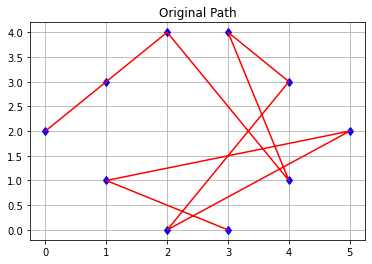

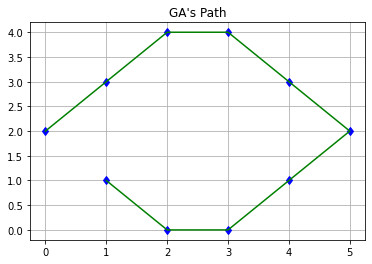

In [267]:
# OUTPUT FINAL DATA

# information about old sequence of coordinates, then GA's sequence
print("Start Point:" + str(original_parent[0]) + "\n")

print("GA's best sequence of points:" + str(last_parent))
print("GA's best distance: " + str(find_dist(last_parent)) + "\n")

print("Original sequence of points:" + str(original_parent))
print("Original distance: " + str(find_dist(original_parent)) + "\n")

pct_change = ( find_dist(original_parent) - find_dist(last_parent) )/ find_dist(original_parent) * 100
print("Percent Improvement:" + str(pct_change) + "%")

# charts of old sequence vs GA's sequence
x, y = np.array(original_parent).T
x_path, y_path = np.array(last_parent).T

plt.title("Original Path")
plt.plot(x, y, "bd")
plt.plot(x, y, "r")
plt.grid()
plt.show()

plt.title("GA's Path")
plt.plot(x_path, y_path, "bd")
plt.plot(x_path, y_path, "g")
plt.grid()
plt.show()